# Segmentação manual da coronária + CNN simples

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
vgg16 (Functional)           (None, 1000)              138357544 
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256256    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4         
=================================================================
Total params: 138,614,061
Trainable params: 138,614,061
Non-trainable params: 0
_________________________________________________________________
```

## Resultado
Não mostrou muito ganho até o momento

In [ ]:
from google.colab import drive
drive.mount('/content/drive' )

Mounted at /content/drive


# Create folder with dataset after filter

- executed only once to create the folder

In [ ]:
from glob import glob
import os
import random
import shutil
import cv2 as cv

Total Positive Cases Stenosis images: 229
Total Negative Cases Stenosis images: 282
stenosis 45
no-stenosis 56
Train sets images Stenosis: 184
Train sets images Non Stenosis: 226
Test sets images Stenosis: 45
Test sets images Non Stenosis: 56


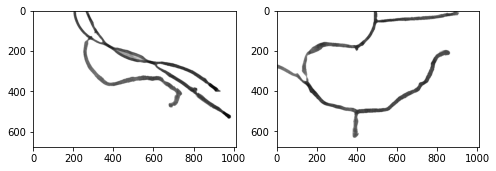

In [ ]:


# data_root = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/original/'
data_root = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/generated-mask/'

path_positive_cases = data_root+'stenosis/'
path_negative_cases = data_root+'no-stenosis/'
# test_id = 'black'

# jpg and png files
positive_images_ls = glob(path_positive_cases+"*.png")
positive_images_ls.extend(glob(path_positive_cases+"*.jpg"))
positive_images_ls.extend(glob(path_positive_cases+"*.jpeg"))
positive_images_ls.extend(glob(path_positive_cases+"*.gif"))

negative_images_ls = glob(path_negative_cases+"*.png")
negative_images_ls.extend(glob(os.path.join(path_negative_cases+"*.jpg")))
negative_images_ls.extend(glob(os.path.join(path_negative_cases+"*.jpeg")))
negative_images_ls.extend(glob(os.path.join(path_negative_cases+"*.gif")))

stenosis = {'class': 'stenosis',
         'path': path_positive_cases,
         'images': positive_images_ls}

non_stenosis = {'class': 'no-stenosis',
             'path': path_negative_cases,
             'images': negative_images_ls}

total_positive_stenosis = len(positive_images_ls)
total_negative_stenosis = len(negative_images_ls)
print("Total Positive Cases Stenosis images: {}".format(total_positive_stenosis))
print("Total Negative Cases Stenosis images: {}".format(total_negative_stenosis))

image_positive = cv.imread(positive_images_ls[1])
image_negative = cv.imread(negative_images_ls[5])

f = plt.figure(figsize=(8, 8))
f.add_subplot(1, 2, 1)
plt.imshow(image_negative)
f.add_subplot(1,2, 2)
plt.imshow(image_positive)

# Create Train-Test Directory
subdirs  = ['../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/train/', 
            '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/test/']
for subdir in subdirs:
    labeldirs = ['stenosis', 'no-stenosis']
    for labldir in labeldirs:
        newdir = subdir + labldir
        os.makedirs(newdir, exist_ok=True)

# seed random number generator
random.seed(237)
# define ratio of pictures used for testing 
test_ratio = 0.2

for cases in [stenosis, non_stenosis]:
    total_cases = len(cases['images']) #number of total images
    num_to_select = int(test_ratio * total_cases) #number of images to copy to test set
    
    print(cases['class'], num_to_select)
    
    list_of_random_files = random.sample(cases['images'], num_to_select) #random files selected

    for files in list_of_random_files:
        shutil.copy2(files, '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/test/' + cases['class'])

# Copy Images to train set
for cases in [stenosis, non_stenosis]:
    image_test_files = os.listdir('../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/test/' + cases['class']) # list test files 
    for images in cases['images']:
        if images.split('/')[-1] not in (image_test_files): #exclude test files from shutil.copy
            shutil.copy2(images, '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/train/' + cases['class'])
            
total_train_stenosis = len(os.listdir('../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/train/stenosis'))
total_train_nonstenosis = len(os.listdir('../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/train/no-stenosis'))
total_test_stenosis = len(os.listdir('../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/test/stenosis'))
total_test_nonstenosis = len(os.listdir('../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/test/no-stenosis'))

print("Train sets images Stenosis: {}".format(total_train_stenosis))
print("Train sets images Non Stenosis: {}".format(total_train_nonstenosis))
print("Test sets images Stenosis: {}".format(total_test_stenosis))
print("Test sets images Non Stenosis: {}".format(total_test_nonstenosis))



# Filtrando imagens


In [ ]:
import numpy as np
import imutils
import cv2 as cv
from skimage.filters import frangi
from matplotlib import pyplot as plt
import matplotlib

In [ ]:
# plt.figure(figsize = (15,15))

print("Python OpenCV version: "+cv.__version__)

# data_root = './dataset2/no-stenosis/'
# data_root_dest = './dataset2/no-stenosis/dest/'
data_root = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/original/stenosis/'
data_root_dest = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/original/stenosis/dest/'

Python OpenCV version: 4.1.2


## Etapa principal de filtro

(-0.5, 982.5, 601.5, -0.5)

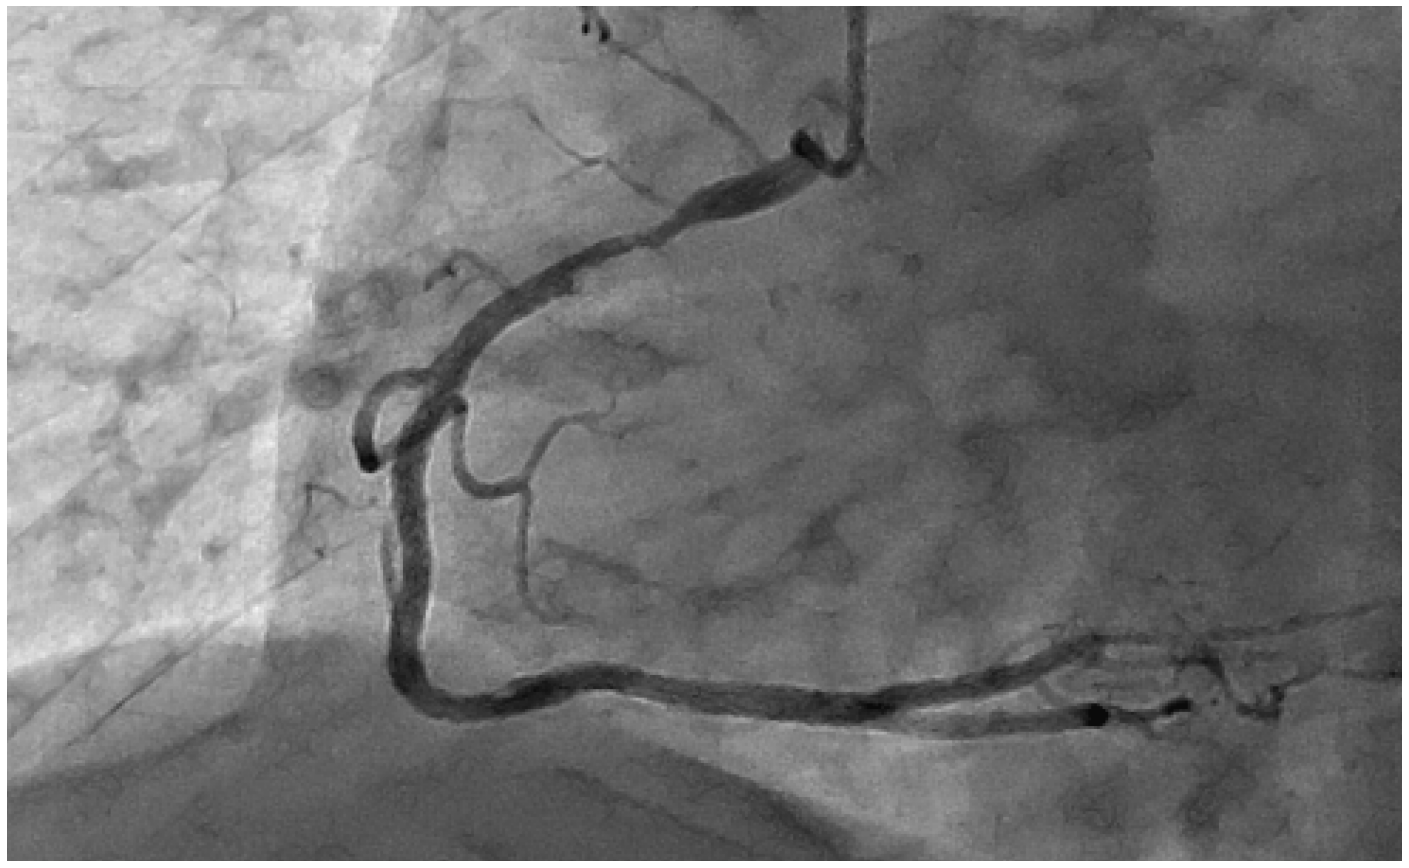

In [ ]:
file_name = 'img-107.png'
img = cv.imread(data_root+file_name)

plt.figure(figsize=(25, 25))
plt.imshow(img)
plt.axis('off')

Found 267 contours


(-0.5, 982.5, 601.5, -0.5)

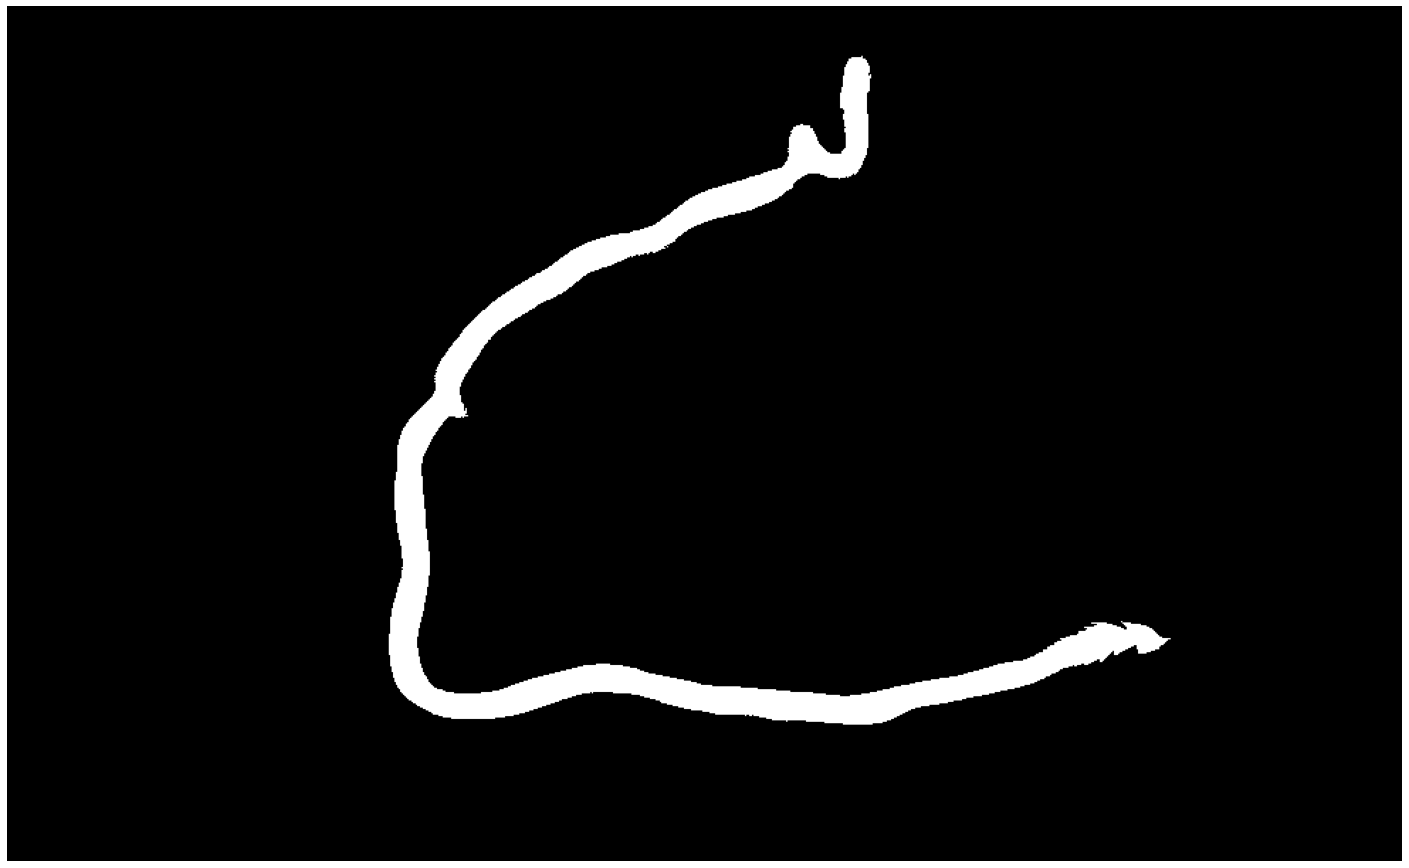

In [ ]:
# Apply the filter instead of input alrady in grayscale
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray_image = cv.fastNlMeansDenoising(gray_image,None,10,7,21)
frangi_img = frangi(gray_image)

# Adjust image from float64 to uint8
norm_img = cv.normalize(src=frangi_img, dst=None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
# gray = norm_img.copy()
gray = cv.bilateralFilter(norm_img, 30, 17, 17)
# edged = cv.Canny(gray, 0, 200)

# Binarization
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

kernel = np.ones((3,3),np.uint8)
closing = cv.morphologyEx(gray,cv.MORPH_CLOSE,kernel, iterations = 2)
blur = cv.blur(closing,(15,15))

gray = cv.medianBlur(blur,5)
gray = clahe.apply(gray)

# ret,thresh = cv.threshold(gray,45,250,0) # -> Manual thresholding 
# Two best threseholding methods for this scenario
thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,45,0)
# thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,65,0)

# Not too good
# thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
# thresh = cv.GaussianBlur(gray,(5,5),0)
# thresh = cv.threshold(thresh,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


# Find contours in grayscale
contours, histogram= cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print("Found "+str(len(contours))+" contours")

# Back to rgb to see the contours
rgb_img = cv.cvtColor(thresh, cv.COLOR_GRAY2RGB)

# cnts = imutils.grab_contours(contours)
# cnts = sorted(cnts, key = cv.contourArea, reverse = True)[:10]
screenCnt = []

for contour in contours:
    if len(contour) > 600 and len(contour) < 1500:
        screenCnt.append(contour)

# cv.drawContours(rgb_img, screenCnt, -1, (0,255,0), 3)

# Your code now applied to the closed image
# cnt = cv.findContours(image_close, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
mask = np.zeros(gray.shape[:2], np.uint8)
cv.drawContours(mask, screenCnt, -1, 255, -1)

plt.figure(figsize=(25, 25))
plt.imshow(mask, cmap='gray')
plt.axis('off')

# Bitwise - White background

(-0.5, 982.5, 601.5, -0.5)

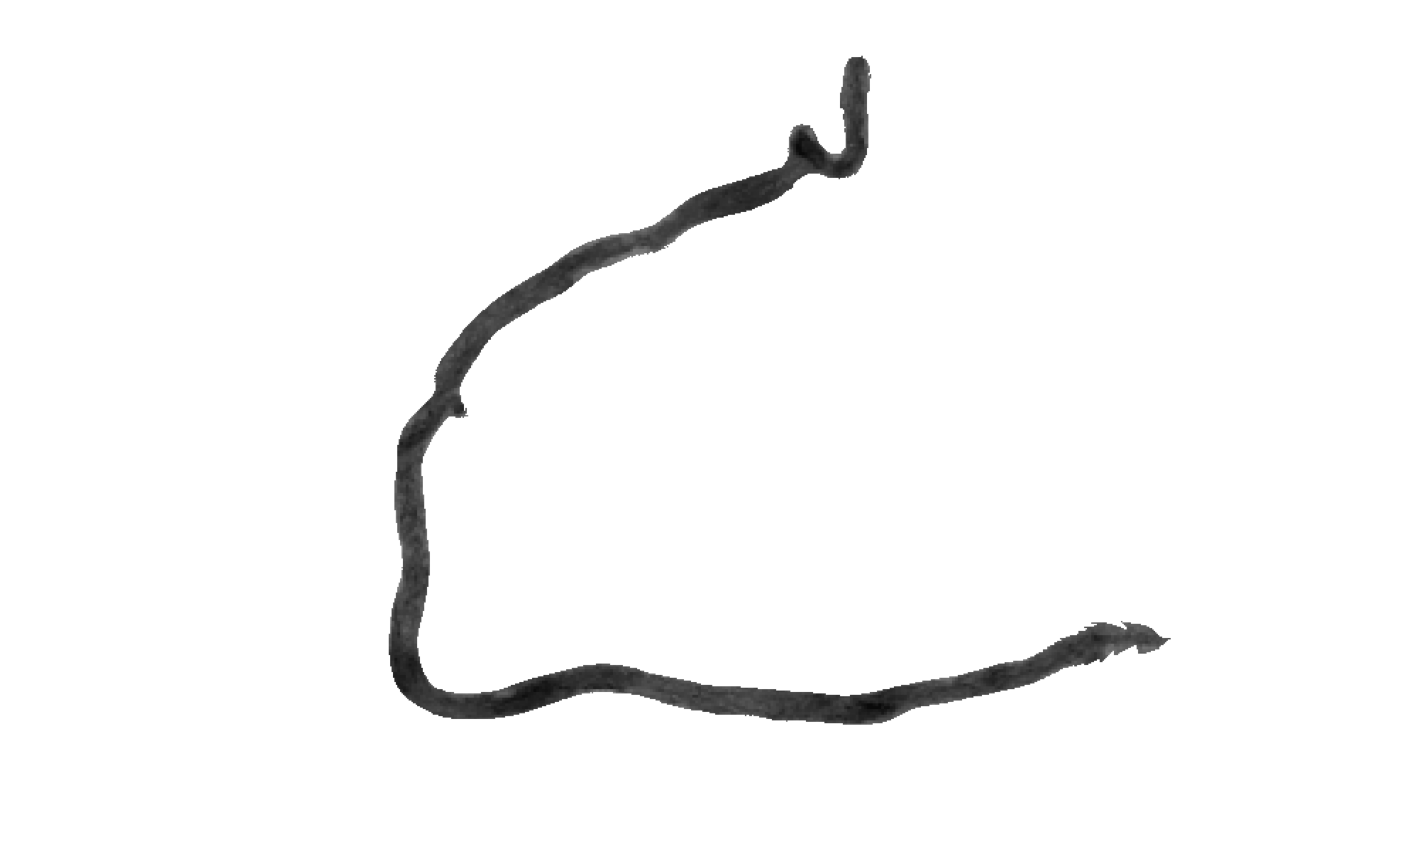

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# file_name = 'img-226.png'
# data_root = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/original/stenosis/'
prefiltered_mask_path = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask/stenosis/result_'+file_name

# img = cv.imread(data_root+file_name)
# mask = cv.imread(prefiltered_mask_path,0)

img1 = img.copy()

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img1.shape
roi = img1[0:rows, 0:cols] #[0:rows, 0:cols]
blank_image = img1.copy()
blank_image[::] = (255,255,255) 
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask)
# plt.imshow(img1_bg)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_or(img1,blank_image,mask = mask)
img2_fg = cv.bitwise_not(img2_fg)
# plt.imshow(img2_fg)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols] = dst

# To invert to black background - just uncommend the following code
# white_px = np.asarray([255, 255, 255])
# black_px = np.asarray([0, 0, 0])

# (row, col) = dst.shape[:2]

# for r in range(row):
#     for c in range(col):
#         if all(dst[r][c] == white_px):
#             dst[r][c] = black_px

plt.figure(figsize=(25, 25))
plt.imshow(dst)
plt.axis('off')

# Bitwise - Black background

(-0.5, 982.5, 601.5, -0.5)

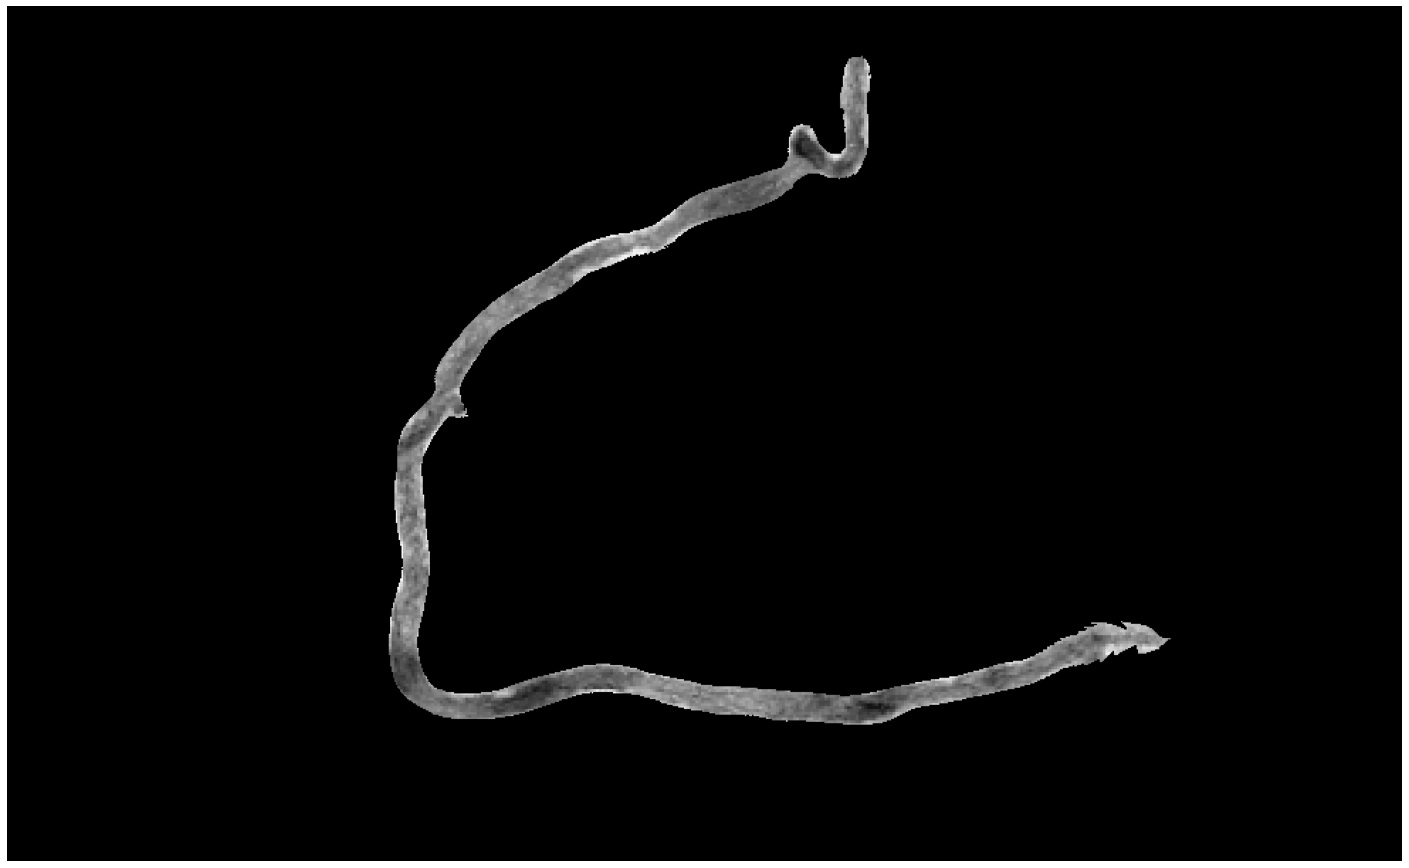

In [ ]:
img1 = img.copy()

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img1.shape
roi = img1[0:rows, 0:cols] #[0:rows, 0:cols]
blank_image = img1.copy()
blank_image[::] = (255,255,255) 
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask)
# plt.imshow(img1_bg)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img1,img1,mask = mask)
# plt.imshow(img2_fg)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols] = dst

plt.figure(figsize=(25, 25))
plt.imshow(img1)
plt.imshow(img1)
plt.axis('off')

# Gerando todas as imagens

To be executed, now with background extraction

In [ ]:
import numpy as np
import imutils
import os
import cv2 as cv
from skimage.filters import frangi
from matplotlib import pyplot as plt
import matplotlib

print("Python OpenCV version: "+cv.__version__)

data_root = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/original/stenosis/'
data_root_dest = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/generated-mask/stenosis/'
mask_root = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask/stenosis/result_'

Python OpenCV version: 4.1.2


In [ ]:
file_count = len(os.listdir(data_root))

f = plt.figure(figsize=(50, 50))
count = 0
    
for filename in os.listdir(data_root):
    
    # create a CLAHE object (Arguments are optional).    
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    # select only the relevant file types
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):

        img = cv.imread(data_root+filename)
        
        # GERANDO O FILTRO NA MAO
#         # Apply the filter instead of input alrady in grayscale
#         gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#         gray_image = cv.fastNlMeansDenoising(gray_image,None,10,7,21)
#         frangi_img = frangi(gray_image)

#         # Adjust image from float64 to uint8
#         norm_img = cv.normalize(src=frangi_img, dst=None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
#         # gray = norm_img.copy()
#         gray = cv.bilateralFilter(norm_img, 30, 17, 17)
#         # edged = cv.Canny(gray, 0, 200)

#         # Binarization
#         clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

#         kernel = np.ones((3,3),np.uint8)
#         closing = cv.morphologyEx(gray,cv.MORPH_CLOSE,kernel, iterations = 2)
#         blur = cv.blur(closing,(15,15))

#         gray = cv.medianBlur(gray,5)
#         gray = clahe.apply(gray)

#         # Two best threseholding methods for this scenario
#         thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,45,0)
#         # thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,65,0)
        
#         # Find contours in grayscale
#         contours, histogram= cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# #         print("Found "+str(len(contours))+" contours")

#         # Back to rgb to see the contours
#         rgb_img = cv.cvtColor(thresh, cv.COLOR_GRAY2RGB)
#         screenCnt = []

#         for contour in contours:
#             if len(contour) > 1000:
#                 screenCnt.append(contour)

#         # Your code now applied to the closed image
#         # cnt = cv.findContours(image_close, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
#         mask = np.zeros(gray.shape[:2], np.uint8)
#         cv.drawContours(mask, screenCnt, -1, 255, -1)

      # begin - filter - USANDO FILTRO COM IMAGEM JA AJUSTADA NO PASSADO  
        prefiltered_mask_path = mask_root+filename
        mask = cv.imread(prefiltered_mask_path,0)
      # end - filter

        # BEGIN of background
        img1 = img.copy()

        # I want to put logo on top-left corner, So I create a ROI
        rows,cols,channels = img1.shape
        roi = img1[0:rows, 0:cols] #[0:rows, 0:cols]
        blank_image = img1.copy()
        blank_image[::] = (255,255,255) 
        mask_inv = cv.bitwise_not(mask)

        # Now black-out the area of logo in ROI
        img1_bg = cv.bitwise_and(roi,roi,mask = mask)
        # plt.imshow(img1_bg)

        # Take only region of logo from logo image.
        img2_fg = cv.bitwise_or(img1,blank_image,mask = mask)
        img2_fg = cv.bitwise_not(img2_fg)
        # plt.imshow(img2_fg)

        # Put logo in ROI and modify the main image
        dst = cv.add(img1_bg,img2_fg)
        img1[0:rows, 0:cols] = dst
        # END of background

        cv.imwrite(data_root_dest+'result_'+filename,img1)

# plt.show(block=True)

<Figure size 3600x3600 with 0 Axes>

# Criando e Testando a Rede Neural
Reference: https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29

In [ ]:
# # import tensorflow as tf
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D
# from tensorflow.keras import applications

# # sequential model 
# # model = Sequential()
# # model.add(applications.VGG16(weights="imagenet"))
# # model.summary()

# # # functional API
# # inp = Input(shape=(224,224,3))
# # out = applications.VGG16(weights='imagenet')(inp)
# # model = Model(inputs=inp, outputs=out)
# # model.summary()

# #  Attaching our own classifier
# model = Sequential()
# model.add(VGG16(include_top=False, input_shape=(224,224,3), pooling='avg'))

# model.add(Flatten())
# model.add(Dense(10))

# model.summary()

# # VGG16 is trained on RGB images of size (224, 224), 
# # which is a default input size of the network.
# # Using a different size, images size should be more than 32 pixels.
# # The last dimension which is 3, represents the number of color channels.

# # Pooling
# # GAP or GMP (global average pooling X global maximum pooling)

# # Global pooling: The shape of the output tensor is (3, 3, 512) and
# # (7, 7, 512). After applying global pooling on any of these 
# # tensors will get us a fixed-size vector of length 512. 
# # So the final output of variable size images will still be a
# # fixed size vector after applying global pooling.

# VGG = VGG16(include_top=False, input_shape=(224,224,3))

# for layer in VGG.layers[:10]:
#     layer.trainable = False 

# for layer in VGG.layers: 
#     sp = '     '[len(layer.name)-9:]
#     print(layer.name, sp, layer.trainable)

# # If the current dataset is similar to the dataset these 
# # networks were trained on, then its good to freeze all 
# # layers since images in both datasets would have similar 
# # features. But if the dataset if different then we should 
# # only freeze top layers and train bottom layers because top 
# # layers extract general features. More similar the dataset 
# # more layers we should freeze.

# #  Using one layer of VGG16 - Simple cnn
# model = Sequential()
# model.add(Conv2D(64, kernel_size=3, input_shape=(224,224,3)))
# model.add(VGG16().layers[2]) # Assing the 3rd layer of pretrained model
# model.summary()

# Neural Network
Reference: https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

Keras ImageDataGenerator - Health: https://medium.com/@rragundez/medical-images-now-supported-by-keras-imagedatagenerator-e67d1c2a1103

Flow From Dictionary: https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


In [ ]:
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation

print("Tensorflow version: " + tensorflow.__version__)

vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

for layer in vgg_conv.layers[16:]:
    layer.trainable = True

for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# Create the model - More complex CNN with pretrained layers
model = Sequential()
model.add(VGG16())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Dense(2, activation='sigmoid'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

2.3.0
58892288/58889256 [==============================] - 0s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8cece1e6d8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8cecdc2d30> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8cecdf3080> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8cecdf3a58> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ce01e54e0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ce01e5c88> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8ce01ed470> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ce01edc18> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ce01f9a90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ce01f9b38> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8ce0201780

# Creating folder structure

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/train/'
validation_dir = '../content/drive/My Drive/Colab Notebooks/CNN-Angiographies/mask-august/test/'

# Load the normalized images
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    rotation_range=5,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255 # Relevant in case of images in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
)

validation_datagen = ImageDataGenerator(
    shear_range=0.2,
    rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        # class_mode='binary',  # since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        # color_mode='grayscale',
        seed=100
        )

# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        # color_mode='grayscale',
        seed=100,
        # class_mode='binary',  # since we use binary_crossentropy loss, we need binary labels
        shuffle=False)

Found 410 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [ ]:

#print(train_gen)
sample_batch = next(train_generator)
xx, yy = sample_batch
print(yy.shape)

(32, 2)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from tensorflow.keras import models
from tensorflow.keras import optimizers

# Configure the model for training
model.compile(
    loss='categorical_crossentropy',
    # loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4), # 'rmsprop'
    metrics=['acc']
)

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch= 2*(train_generator.samples//train_generator.batch_size),
      # steps_per_epoch= 800 // train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps= (validation_generator.samples//validation_generator.batch_size),
      # validation_steps= 200 // validation_generator.batch_size,
      verbose=1
)

Epoch 1/20
13/24 [===============>..............] - 15s 1s/step - loss: 0.6918 - acc: 0.5512 - val_loss: 0.6910 - val_acc: 0.5833


## Results

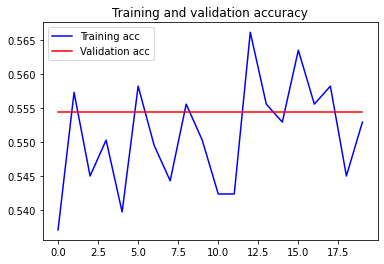

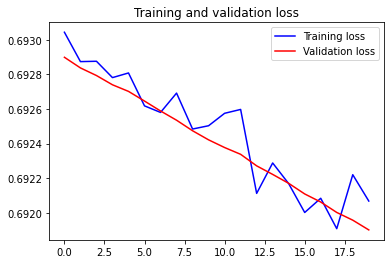

In [ ]:
import matplotlib.pyplot as plt

# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

## Errors

In [ ]:
from keras.preprocessing.image import load_img
# Utility function for obtaining of the errors 
def obtain_errors(val_generator, predictions):
    # Get the filenames from the generator
    fnames = validation_generator.filenames

    # Get the ground truth from generator
    ground_truth = validation_generator.classes

    # Get the dictionary of classes
    label2index = validation_generator.class_indices

    # Obtain the list of the classes
    idx2label = list(label2index.keys())
    print("The list of classes: ", idx2label)

    # Get the class index
    predicted_classes = np.argmax(predictions, axis=1)

    errors = np.where(predicted_classes != ground_truth)[0]
    print("Number of errors = {}/{}".format(len(errors),validation_generator.samples))
    
    return idx2label, errors, fnames


# Utility function for visualization of the errors
def show_errors(idx2label, errors, predictions, fnames):
    # Show the errors
    for i in range(len(errors)):
        pred_class = np.argmax(predictions[errors[i]])
        pred_label = idx2label[pred_class]

        title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
            fnames[errors[i]].split('/')[0],
            pred_label,
            predictions[errors[i]][pred_class])

        original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
        plt.figure(figsize=[7,7])
        plt.axis('off')
        plt.title(title)
        plt.imshow(original)
        plt.show()

4/3 [======================================] - 1s 355ms/step
The list of classes:  ['no-stenosis', 'stenosis']
Number of errors = 45/101


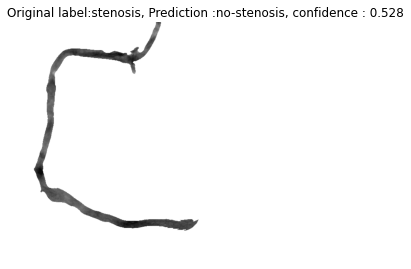

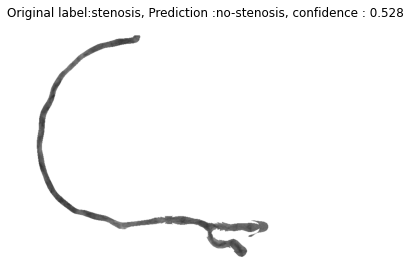

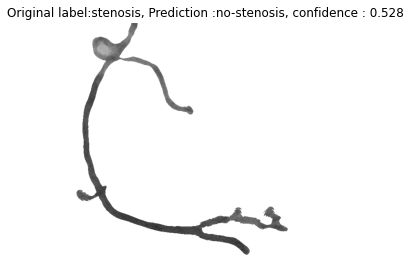

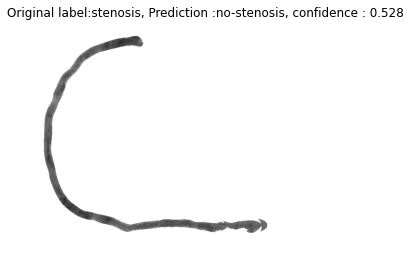

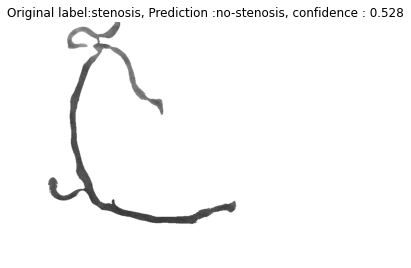

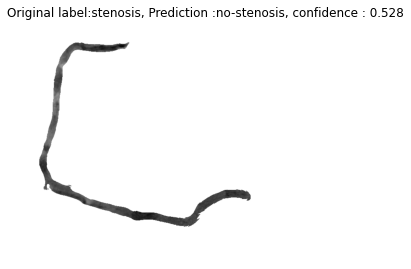

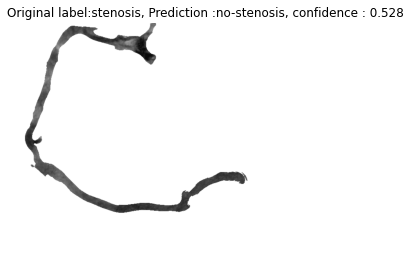

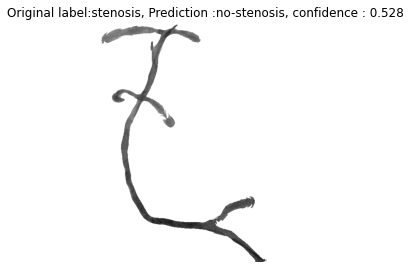

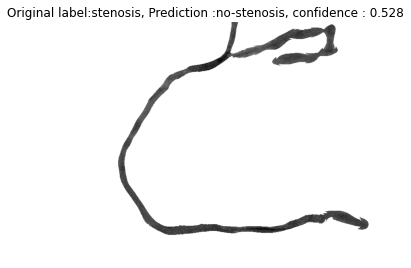

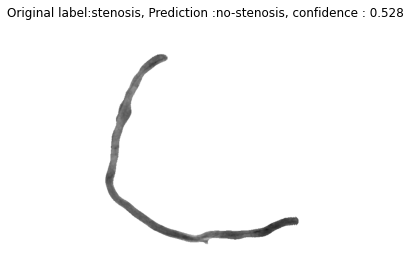

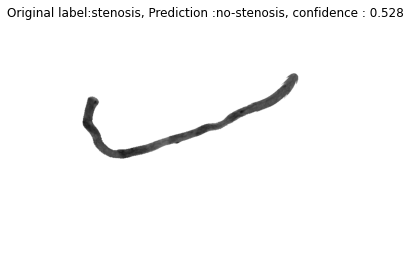

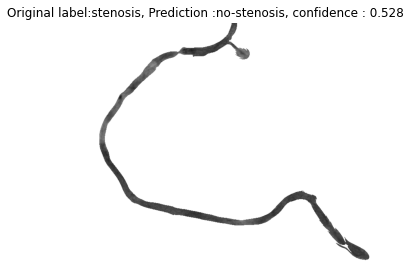

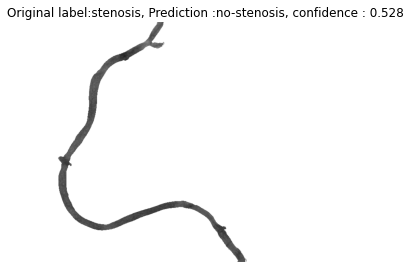

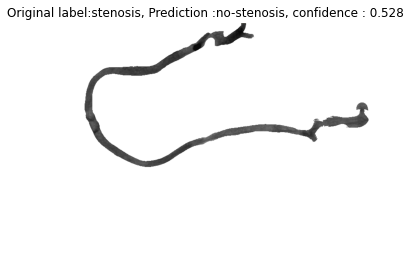

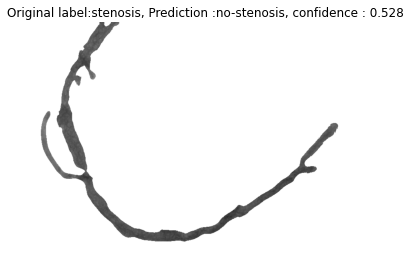

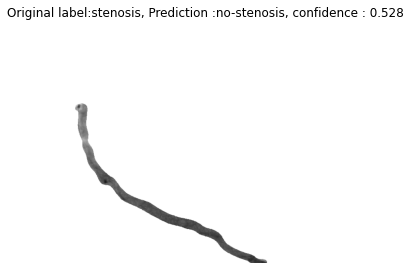

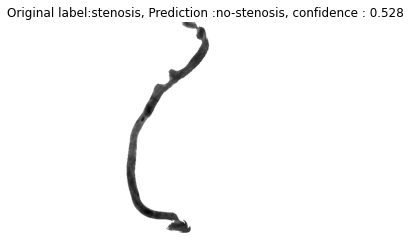

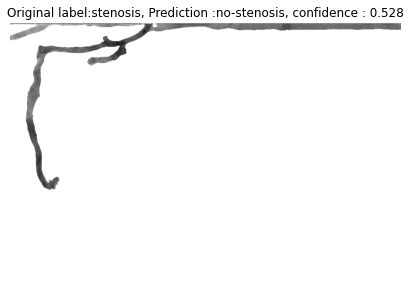

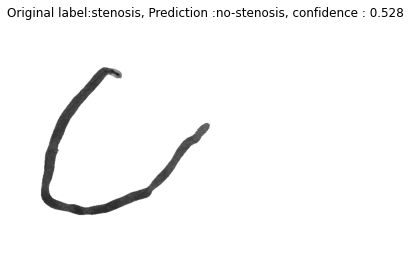

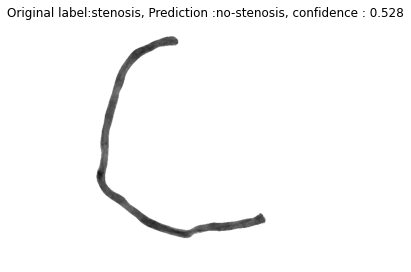

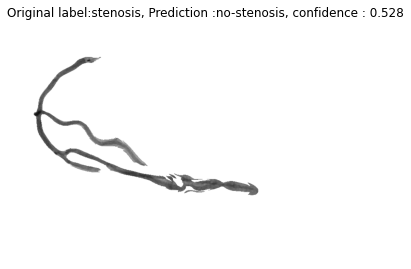

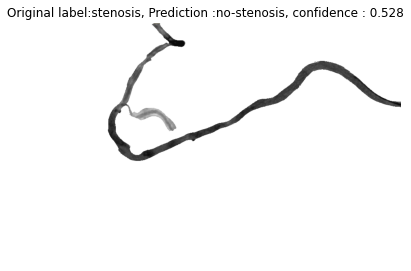

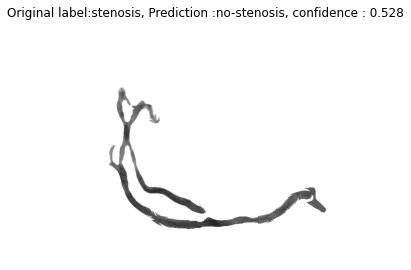

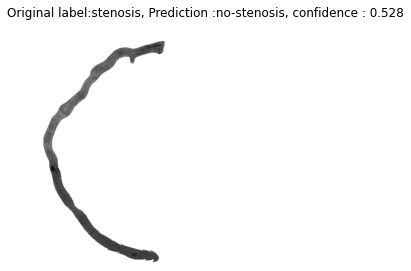

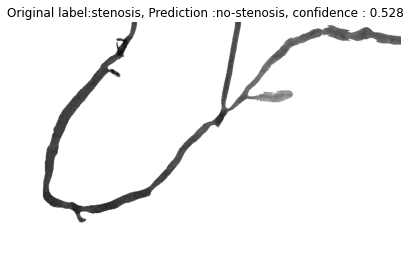

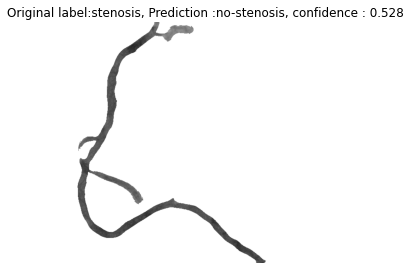

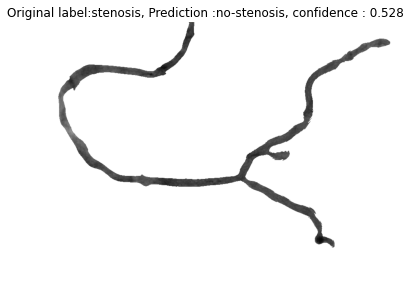

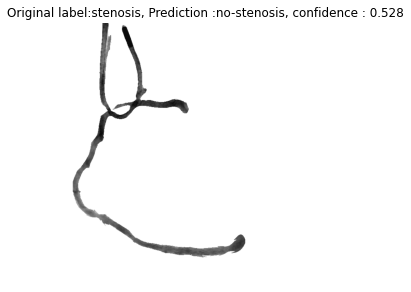

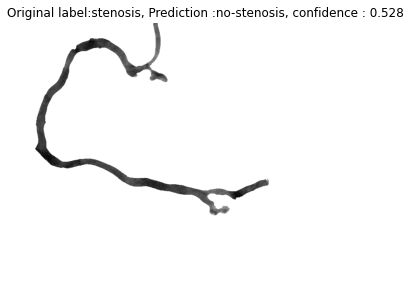

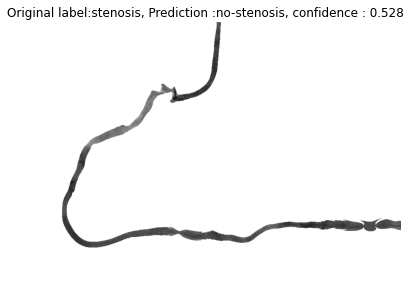

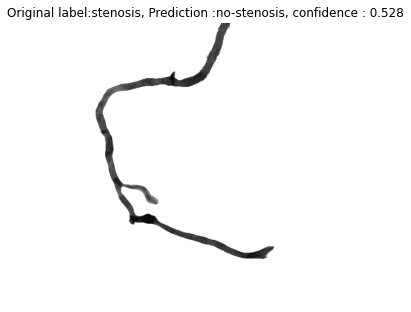

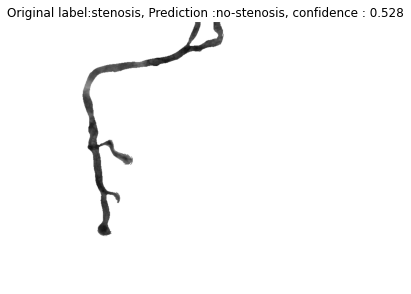

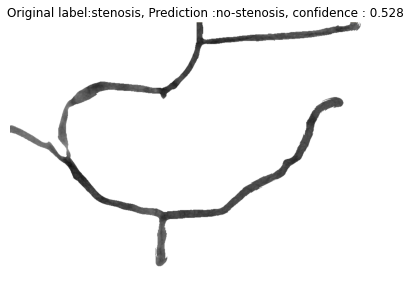

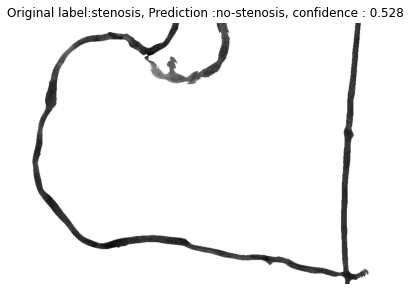

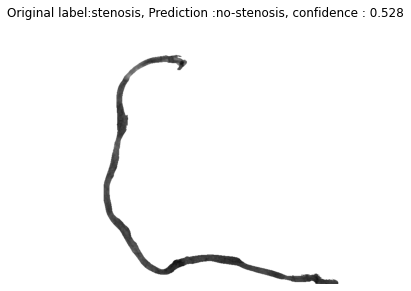

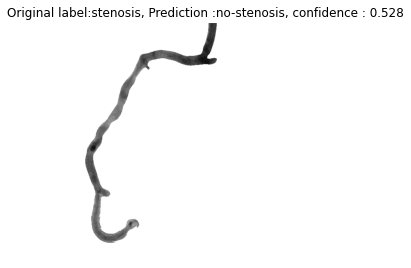

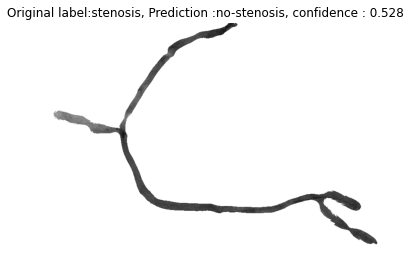

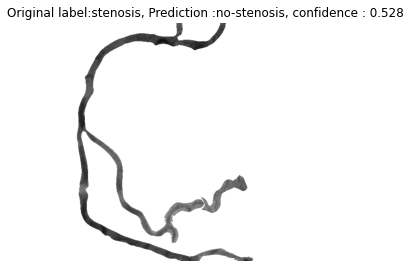

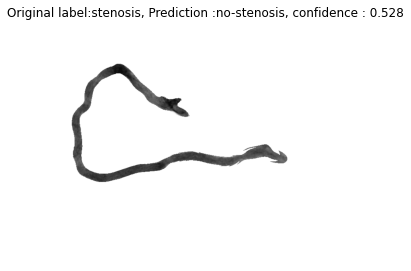

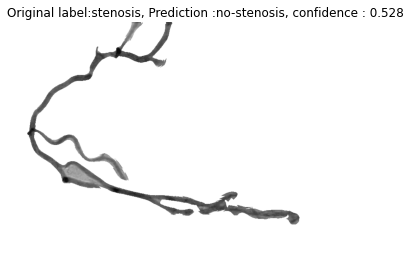

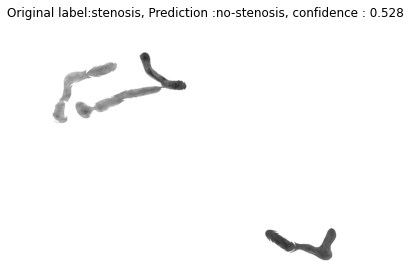

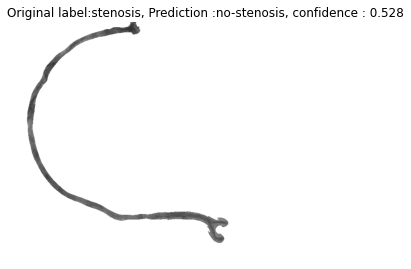

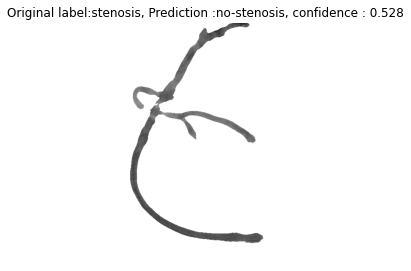

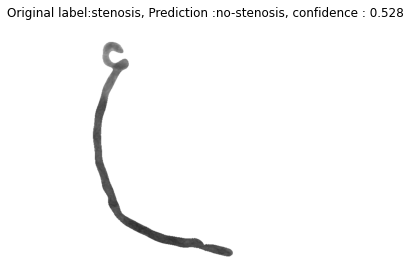

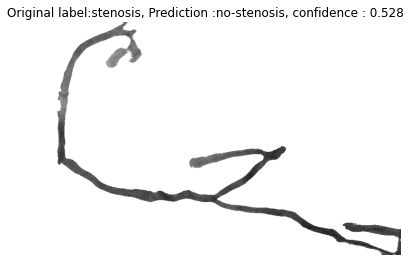

In [ ]:
import numpy as np
# Get the predictions from the model using the generator
predictions = model.predict(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)

# Run the function to get the list of classes and errors
idx2label, errors, fnames = obtain_errors(validation_generator, predictions)

# Run the function to illustrate the error cases
show_errors(idx2label, errors, predictions, fnames)